In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Reading training and testing datasets

In [4]:
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

# EDA

In [43]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The column 'Id' is not required for analysis

In [44]:
train.shape

(1460, 81)

In [45]:
test.shape

(1459, 80)

In [126]:
# Checking for missing values in the train data
missing = train.isna().sum()
missing[missing != 0]

Series([], dtype: int64)

In [214]:
px.histogram(x=train['LotFrontage'], template='plotly_dark', nbins=100)

fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['LotFrontage'], nbinsx=200), row=1, col=1)
fig.add_shape(type="line", xref="x1", yref="y1", x0=170, y0=0, x1=170, y1=800, line={'width': 1, 'color': 'red'})
fig.add_shape(type="line", xref="x2", yref="y1", x0=170, y0=0, x1=170, y1=800, line={'width': 1, 'color': 'red'})
fig.add_trace(go.Scatter(x=train['LotFrontage'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="LotFrontage Analysis", template='plotly_dark')
fig

The values which is greater than 170 can be considered as outliers. But most of the time, the SalePrice comes in between 200k and 400k, hence these datapoints can influence the target variable. Therefore it shouldn't be removed.

In [213]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['LotArea'], nbinsx=200), row=1, col=1)
fig.add_shape(type="line", xref="x1", yref="y1", x0=40000, y0=0, x1=40000, y1=800, line={'width': 1, 'color': 'red'})
fig.add_shape(type="line", xref="x2", yref="y1", x0=40000, y0=0, x1=40000, y1=800, line={'width': 1, 'color': 'red'})
fig.add_trace(go.Scatter(x=train['LotArea'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="LotArea Analysis", template='plotly_dark')
fig

Values in the column 'LotArea' greater than 40k can be considered as outliers. But they kind of influence the target variable as all of them fall in a similar interval.

In [95]:
px.scatter(data_frame=train, x='Street', y='SalePrice', template='plotly_dark', width=500, height=300)

It is clear that when the street is Grvl, the Sale Price is less, hence this can affect the coefficient of regression. No need to drop this column even though the number of datapoints with value grvl is less.

In [212]:
px.histogram(x=train['MasVnrArea'], template='plotly_dark', nbins=100, width=700, height=300)

fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['MasVnrArea'], nbinsx=100), row=1, col=1)
fig.add_shape(type="line", xref='x1', yref='y1', x0=670, y0=0, x1=670, y1=900, line={'width': 1, 'color': 'red'})
fig.add_shape(type="line", xref='x2', yref='y1', x0=670, y0=0, x1=670, y1=900, line={'width': 1, 'color': 'red'})
fig.add_trace(go.Scatter(x=train['MasVnrArea'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="MasVnrArea Analysis", template='plotly_dark')
fig

Values in column 'MasVnrArea' can be considered as outliers if it is greater than 670. But they have influence on the target variable. Also, they are high in number, hence removing them can cause huge loss in data.

In [211]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['BsmtFinSF1'], nbinsx=200), row=1, col=1)
fig.add_shape(type="line", xref='x1', yref='y1', x0=2200, y0=0, x1=2200, y1=900, line={'width': 1, 'color': 'red'})
fig.add_shape(type="line", xref='x2', yref='y1', x0=2200, y0=0, x1=2200, y1=900, line={'width': 1, 'color': 'red'})
fig.add_trace(go.Scatter(x=train['BsmtFinSF1'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="BsmtFinSF1 Analysis", template='plotly_dark')
fig

Values in column 'BsmtFinSF1' can be considered outliers if their value is greater than 2200. They can be removed.

In [210]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['TotalBsmtSF'], nbinsx=300), row=1, col=1)
fig.add_shape(type="line", xref='x1', yref='y1', x0=2400, y0=0, x1=2400, y1=900, line={'width': 1, 'color': 'red'})
fig.add_shape(type="line", xref='x2', yref='y1', x0=2400, y0=0, x1=2400, y1=900, line={'width': 1, 'color': 'red'})
fig.add_trace(go.Scatter(x=train['TotalBsmtSF'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="TotalBsmtSF Analysis", template='plotly_dark')
fig

Values in column 'BsmtFinSF1' can be considered outliers if their value is greater than 2400. But they can influence the target variable as they all come in the similar group for SalePrice.

In [209]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['1stFlrSF'], nbinsx=200), row=1, col=1)
fig.add_shape(type="line", xref='x1', yref='y1', x0=2500, y0=0, x1=2500, y1=900, line={'width': 1, 'color': 'red'})
fig.add_shape(type="line", xref='x2', yref='y1', x0=2500, y0=0, x1=2500, y1=900, line={'width': 1, 'color': 'red'})
fig.add_trace(go.Scatter(x=train['1stFlrSF'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="1stFlrSF Analysis", template='plotly_dark')
fig

Values in column '1stFlrSF' can be considered outliers if their value is greater than 2500. But the same values can influence the target variable as they all come in similar group for SalePrice. Hence there is no need in removing these values.

In [208]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['WoodDeckSF'], nbinsx=100), row=1, col=1)
fig.add_shape(type="line", xref='x1', yref='y1', x0=560, y0=0, x1=560, y1=900, line={'width': 1, 'color': 'red'})
fig.add_shape(type="line", xref='x2', yref='y1', x0=560, y0=0, x1=560, y1=900, line={'width': 1, 'color': 'red'})
fig.add_trace(go.Scatter(x=train['WoodDeckSF'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="WoodDeckSF Analysis", template='plotly_dark')
fig

Here in column 'WoodDeckSF', there are outliers when the value is greater than 560. But these values are able to influence the target variable. For all these values, the range of SalePrice is similar. Hence, it should not be avoided.

In [207]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['OpenPorchSF'], nbinsx=300), row=1, col=1)
fig.add_shape(type="line", xref='x1', yref='y1', x0=250, y0=0, x1=250, y1=900, line={'width': 1, 'color': 'red'})
fig.add_shape(type="line", xref='x2', yref='y1', x0=250, y0=0, x1=250, y1=900, line={'width': 1, 'color': 'red'})
fig.add_trace(go.Scatter(x=train['OpenPorchSF'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="OpenPorchSF Analysis", template='plotly_dark')
fig

Here in column 'OpenPorchSF', there are outliers when the value is greater than 250. But these values are able to influence the target variable. For all these values, the range of SalePrice is similar. Hence, it should not be avoided.

In [206]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['EnclosedPorch'], nbinsx=200), row=1, col=1)
fig.add_shape(type="line", xref='x1', yref='y1', x0=290, y0=0, x1=290, y1=900, line={'width': 1, 'color': 'red'})
fig.add_shape(type="line", xref='x2', yref='y1', x0=290, y0=0, x1=290, y1=900, line={'width': 1, 'color': 'red'})
fig.add_trace(go.Scatter(x=train['EnclosedPorch'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="EnclosedPorch Analysis", template='plotly_dark')
fig

Here in column 'EnclosedPorch', there are outliers when the value is greater than 290. But these values are able to influence the target variable. For all these values, the range of SalePrice is similar. Hence, it should not be avoided.

In [111]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['3SsnPorch'], nbinsx=2), row=1, col=1)
fig.add_trace(go.Scatter(x=train['3SsnPorch'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="3SsnPorch Analysis", template='plotly_dark')
fig.show()

In this column '3SsnPorch', zero is the most frequent value. But when the value is different, it always comes under similar range of SalePrice. Hence this column shouldn't be dropped even though the percentage of zeros are greater than 95.

In [113]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['ScreenPorch'], nbinsx=20), row=1, col=1)
fig.add_trace(go.Scatter(x=train['ScreenPorch'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="ScreenPorch Analysis", template='plotly_dark')
fig.show()

It is clear that this column 'ScreenPorch' doesn't give much information, hence can be removed.

In [124]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['PoolArea'], nbinsx=20), row=1, col=1)
fig.add_trace(go.Scatter(x=train['PoolArea'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="PoolArea Analysis", template='plotly_dark')
fig.show()

In this column 'PoolArea', zero is the most frequent value. But when the value is different, it always comes under similar range of SalePrice. Hence this column shouldn't be dropped even though the percentage of zeros is higher.

In [125]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Outlier Analysis', 'Influence on Target Variable'])

fig.add_trace(go.Histogram(x=train['MiscVal'], nbinsx=20), row=1, col=1)
fig.add_trace(go.Scatter(x=train['MiscVal'], y=train['SalePrice'], mode='markers', marker={'color':'Green'}), row=1, col=2)

fig.update_layout(height=400, width=800, title_text="MiscVal Analysis", template='plotly_dark')
fig.show()

In this column 'MiscVal', zero is the most frequent value. But when the value is different, it always comes under similar range of SalePrice. Hence this column shouldn't be dropped even though the percentage of zeros is higher.

In [87]:
px.scatter(x='YearBuilt', y='SalePrice', data_frame=train, template='plotly_dark', width=700, height=400)

It could be seen that the SalePrice and YearBuilt is cross related. The sale price is higher for houses that are built recently.

### Using Pandas Profiling for EDA

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train)

In [ ]:
profile.to_file("Pandas_Profile.html")

1. For the column 'LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',   there are missing values, we can impute mode value here.

2. For the column 'GarageYrBlt', there are missing values that can be imputed using mean.

3. The columns 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence' and 'ExterCond' are considered as categorical, we can convert it into numerical based on it's order.

4. The percentage of missing values is very high in the columns: 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'. So it is better to remove these columns.


# Pre-Processing

In [116]:
# Deleting the unwanted column
train.drop('Id', inplace=True, axis=1)
train.shape

(1458, 79)

In [114]:
# Removing the outliers from the column BsmtFinSF1
outlier_index = train[train['BsmtFinSF1'] > 2200].index
train.drop(outlier_index, inplace=True)

In [115]:
# Dropping the column 'ScreenPorch'
train.drop('ScreenPorch', inplace=True, axis=1)

In [117]:
# Imputing missing values in the columns where it can be replaced by mode
columns = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 
           'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
mode_values = dict()
for i in columns:
  mode_values[i] = train[i].mode()[0]
  train[i].fillna(mode_values[i], inplace=True)

In [118]:
# Dropping the columns with high percentage of missing values
high_missing_value_columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley']
train.drop(high_missing_value_columns, inplace=True, axis=1)

In [119]:
# Imputing missing values in column 'GarageYrBlt' with mean
GarageYrBlt_mean = train['GarageYrBlt'].mean()
train['GarageYrBlt'].fillna(GarageYrBlt_mean, inplace=True)

# Modelling

In [ ]:
!pip install pycaret

In [195]:
from pycaret.regression import *
reg = setup(data=train, target='SalePrice', session_id=111)

,Description,Value
0,session_id,111
1,Target,SalePrice
2,Original Data,"(1458, 74)"
3,Missing Values,False
4,Numeric Features,17
5,Categorical Features,56
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1020, 384)"


In [196]:
# Comparing models
best = compare_models(round=2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,16872.62,6.316341e+08,24782.48,0.90,0.14,0.10,0.03
ridge,Ridge Regression,17125.60,6.586948e+08,25333.66,0.89,0.16,0.11,0.04
gbr,Gradient Boosting Regressor,16943.62,7.122751e+08,26075.23,0.89,0.14,0.10,0.60
lightgbm,Light Gradient Boosting Machine,17329.72,7.859284e+08,27218.29,0.88,0.14,0.10,0.19
lasso,Lasso Regression,19113.97,8.123677e+08,28220.97,0.87,0.28,0.12,0.15
rf,Random Forest Regressor,18365.34,8.432677e+08,28378.67,0.87,0.15,0.11,1.91
br,Bayesian Ridge,19474.08,8.553495e+08,28514.78,0.86,0.17,0.12,0.34
lr,Linear Regression,19934.27,8.841276e+08,29417.20,0.85,0.26,0.13,0.04
en,Elastic Net,20178.35,9.099130e+08,29698.84,0.85,0.17,0.12,0.17
et,Extra Trees Regressor,22296.73,1.227619e+09,34447.89,0.80,0.18,0.13,2.01


### Orthogonal Matching Pursuit

In [197]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14382.0107,3.792136e+08,19473.4062,0.9178,0.1177,0.0872
1,17762.7402,5.642711e+08,23754.3906,0.8833,0.2221,0.1219
2,21080.8379,1.035835e+09,32184.3848,0.9069,0.1569,0.1178
3,15906.6006,4.822144e+08,21959.3809,0.9180,0.1328,0.0934
4,15682.6074,4.914390e+08,22168.4238,0.9204,0.1196,0.0884
5,19314.9297,8.631321e+08,29379.1094,0.8653,0.2037,0.1378
6,16443.4688,8.628346e+08,29374.0469,0.8834,0.1401,0.0981
7,15090.0957,4.274316e+08,20674.4199,0.8776,0.1702,0.1009
8,18113.0762,8.020668e+08,28320.7832,0.8590,0.1642,0.1065
9,17479.6562,6.785104e+08,26048.2324,0.9033,0.1521,0.1071


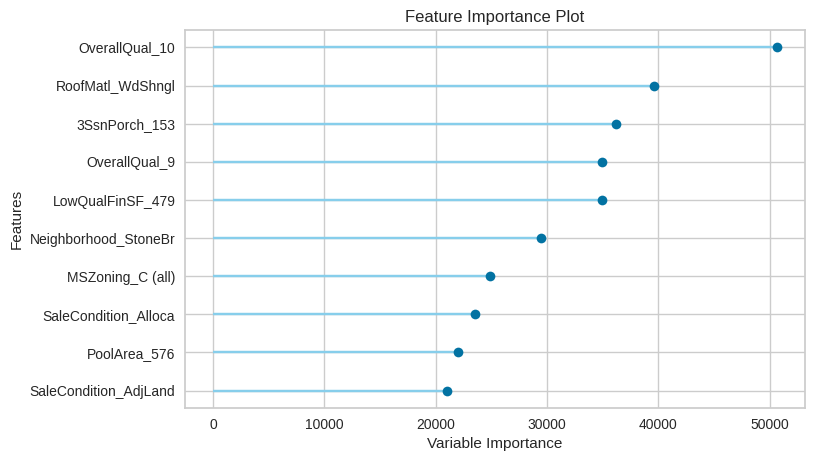

In [198]:
plot_model(ridge, plot='feature')

In [199]:
predict_model(ridge).head(2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,17008.869141,576044672.0,24000.929688,0.9093,0.1396,0.1014


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,MiscVal_480,MiscVal_500,MiscVal_54,MiscVal_560,MiscVal_600,MiscVal_700,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,50.0,6305.0,1938.0,1950.0,0.0,0.0,0.0,920.0,920.0,954.0,0.0,954.0,1938.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,119750.0,141656.875
1,60.0,7162.0,1966.0,1966.0,41.0,0.0,0.0,876.0,876.0,904.0,0.0,904.0,1966.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,109900.0,100447.750


### Huber Regressor

In [176]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12841.3533,3.105549e+08,17622.5691,0.9326,0.1012,0.0763
1,15324.9297,4.427698e+08,21042.0950,0.9084,0.1958,0.0993
2,20977.3246,1.109958e+09,33316.0388,0.9002,0.1548,0.1159
3,14067.2284,3.713932e+08,19271.5641,0.9368,0.1086,0.0809
4,13408.8030,3.772161e+08,19422.0508,0.9389,0.1091,0.0770
5,16698.2835,7.330692e+08,27075.2505,0.8856,0.1889,0.1232
6,15320.7891,8.435750e+08,29044.3631,0.8860,0.1355,0.0939
7,12219.8398,2.620087e+08,16186.6823,0.9250,0.1221,0.0816
8,17018.7182,6.640658e+08,25769.4733,0.8833,0.1677,0.0998
9,17247.7769,7.396741e+08,27196.9505,0.8946,0.1465,0.1023


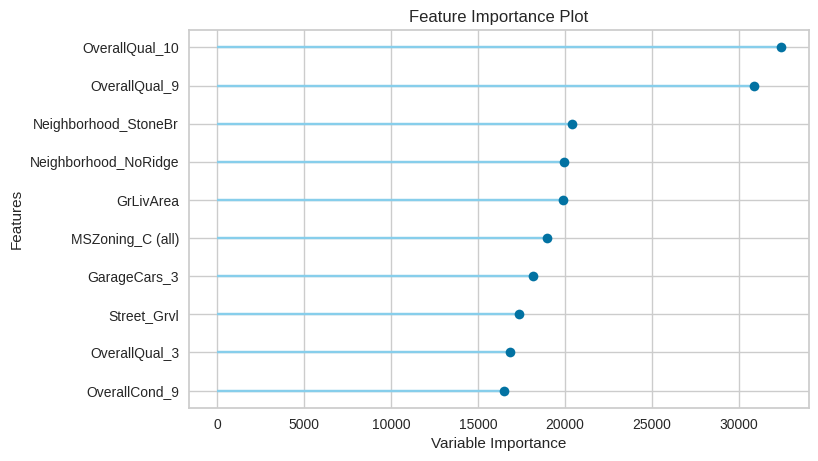

In [177]:
plot_model(huber, plot='feature')

In [179]:
predict_model(huber).head(2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,15359.6805,5.945535e+08,24383.4686,0.9064,0.1278,0.0895


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,MiscVal_480,MiscVal_500,MiscVal_54,MiscVal_560,MiscVal_600,MiscVal_700,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,-0.777789,-0.397246,-1.125847,-1.671562,-0.563287,-1.017258,-0.303522,0.845025,-0.328590,-0.550784,-0.788445,-1.115427,-1.701999,-1.093274,-0.761022,-0.703811,-0.340898,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,119750.0,126966.106753
1,-0.331689,-0.313132,-0.182798,-0.897049,-0.336665,-1.017258,-0.303522,0.742381,-0.436026,-0.683665,-0.788445,-1.216800,-0.527469,-0.301573,-0.761022,-0.703811,-0.340898,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,109900.0,97058.947309


In [200]:
final_model = finalize_model(ridge)

# Prediction on test set

In [181]:
test_copy = test.copy()

In [182]:
# Deleting the unwanted column
test_copy.drop('Id', inplace=True, axis=1)

In [183]:
# Dropping the column 'ScreenPorch'
test_copy.drop('ScreenPorch', inplace=True, axis=1)

In [184]:
for i in mode_values:
  test_copy[i].fillna(mode_values[i], inplace=True)

In [185]:
test_copy.drop(high_missing_value_columns, inplace=True, axis=1)

In [186]:
test_copy['GarageYrBlt'].fillna(GarageYrBlt_mean, inplace=True)

In [205]:
predictions = predict_model(final_model, test_copy)
predictions.Label

0       116841.2500
1       162798.8125
2       201429.6875
3       200673.8125
4       203283.1875
           ...     
1454     90793.4375
1455     76785.8750
1456    179466.6875
1457    119043.6250
1458    207475.5625
Name: Label, Length: 1459, dtype: float32

In [203]:
output = pd.DataFrame()
output['Id'] = test['Id']
output['SalePrice'] = predictions.Label
output.set_index('Id')
output.to_csv('Attempt_2.csv')

In [151]:
test['Id'].values

array([1461, 1462, 1463, ..., 2917, 2918, 2919])

In [120]:
train.shape

(1458, 74)

In [109]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS